<a href="https://colab.research.google.com/github/valmyr/PDS_Filtro_CIC/blob/main/PDS_sinal_projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import os


In [ ]:
sample_rate =120 #1khz
start_time = 0 #0s
end_time = 2 #10s

time = np.arange(start_time,end_time,1/sample_rate)

theta = 0


def main():
    print("[1] - Senoidal")
    print("[2] - impulso")
    print("[3] - Arbitrária")
    op = int(input(">>"))

    if(op == 1):
        wave = senoidal(time)
        plt.plot(time,wave)
    elif(op == 2):
        wave = impulso(time)
    elif(op == 3):
        wave = arbitraria(time)
        plt.plot(time,wave)
    else:
        print("Entrada indefinida")
        main()
    sinwave_int = []
    with open("input2_t.txt",'w') as txt:
        for i in wave:
            txt.write(hex(int(np.ceil(i)))[2:]+'\n')
            #print(i)
           #print((int((i))))
           # txt.write(str(i))
           #txt.write(f'{str(bin(int(i)))[2:]}\n')
            #sinwave_int.append(int(np.ceil(i)))




[1] - Senoidal
[2] - impulso
[3] - Arbitrária
>>3


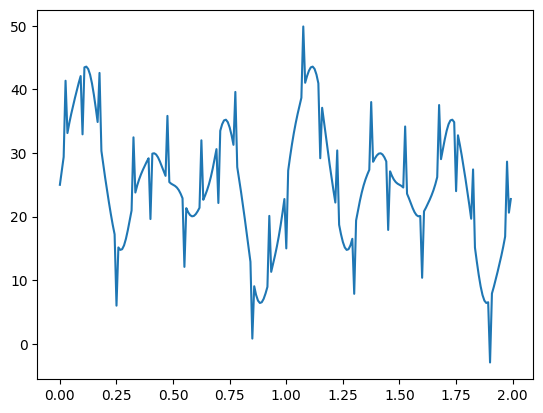

In [ ]:
def senoidal(time):
    amplitude = 10
    offset = 10
    frequency = 3
    offsetvec = np.ones(len(time))*20
    noises = np.zeros(len(time))
    tmp =1
    sgn = 1
    for i in range(len(time)):

        if(i==5*tmp):
            tmp +=5
            noises[i] = 10*sgn
            sgn*=-1
        else:
            noises[i] = 0

    sinwave = amplitude*np.cos(2*np.pi*frequency*time)+offsetvec + noises
    plt.plot(time,noises)
    return sinwave
def arbitraria(time):
    frequency = [3,5,2,1,10]
    amplitude = [10, -2,7,3,.6]
    offset = sum(amplitude)
    sinwave = np.zeros(len(time))
    noises = np.zeros(len(time))
    tmp =1
    sng=1

    for i in range(len(time)):
        if(i==3*tmp):
            tmp +=3
            noises[i] = 2*sng
            sng*=-1
        else:
            noises[i] = 0

    for i in range(len(amplitude)):
            sinwave +=5 + amplitude[i]*(np.sin(2*np.pi*frequency[i]*time+theta)) + noises

    return sinwave
def impulso(time):
    impulso_out = np.zeros(len(time))
    impulso_out[0] = 100
    return impulso_out;

def dec2hex(y):
    y_hex = []
    for i in range(len(y)):
        y_hex.append(hex(int(np.ceil(y[i])[2:])))
    return y_hex;
main()

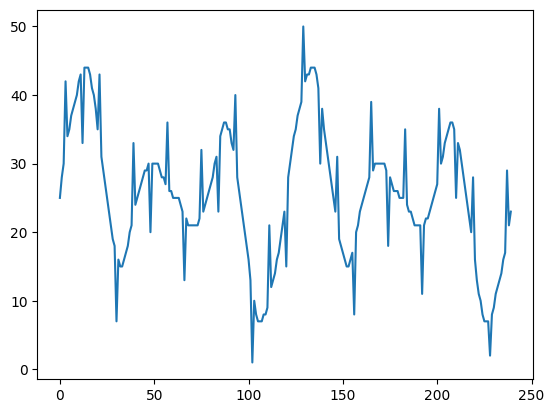

In [ ]:
f = open("/content/input2_t.txt")
x = []
for i in f:
    x.append(int(i,16))
plt.plot(x)